Training min:  20309.933
Min epoch:  1006
Start: 5495027

Day 5495250
EMA Cost: 21310.987
--------------------
Day 5495500
EMA Cost: 20914.984
--------------------
Day 5495750
EMA Cost: 20793.894
--------------------
Day 5496000
EMA Cost: 20986.525
--------------------


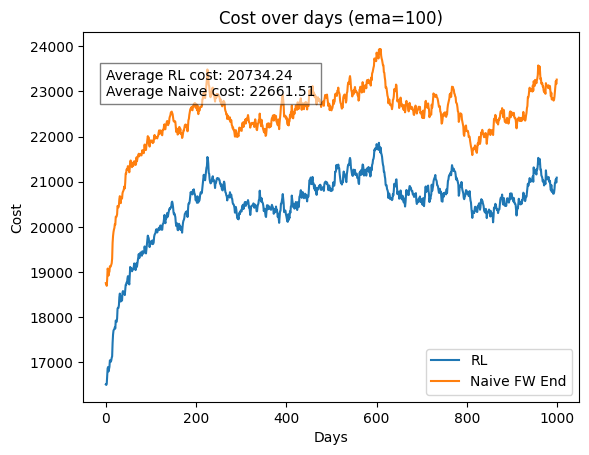

In [2]:

from random import randint
import sys
import os
import numpy as np


current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
sys.path.insert(0, parent_directory)


from optimisation.utils.gen_utils import get_ema
from optimisation.train_test_utils import get_naive_label, run_validation
from optimisation.naive import simulate_day_naive
from optimisation.gen_data import getDayData, getTickData, getTicksForDay
from algorithm import STATE_SIZE, ACTION_SIZE, load_policy_network_checkpoint
from algorithm import predict
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from random import randint

basename = "e3000_r10_amul4_rmul4_sta20"
filename = f"checkpoints/{basename}.pth"
policy_network, min, min_epoch = load_policy_network_checkpoint(filename)

start = randint(5000000, 6000000)
print("Training min: ", round(min, 3))
print("Min epoch: ", min_epoch)
print("Start:", start)
print()

env = {
    "deferables": None,
    "flywheel_amt": 0
}

history_ticks = []


number_of_days = 1000

naive_params = {
    "satisfy_end": True,
    "use_flywheel": True
}

rl_costs, naive_costs = run_validation(start, number_of_days, policy_network, naive_params)

ema_amount = 100
plt.plot(get_ema(rl_costs, ema_amount), label="RL")
plt.plot(get_ema(naive_costs, ema_amount), label=get_naive_label(naive_params))

mid_y = (max(get_ema(naive_costs, ema_amount)) - max(get_ema(rl_costs, ema_amount)))//2 + max(get_ema(rl_costs, ema_amount))
plt.text(0, mid_y, 
f'''Average RL cost: {round(np.mean(rl_costs), 2)}
Average Naive cost: {round(np.mean(naive_costs), 2)}''', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel("Days")
plt.ylabel("Cost")
plt.title("Cost over days (ema=100)")
plt.legend()
plt.savefig(f"plots/{basename}_val.png", dpi=500)
plt.show()